# Lab 6

In [0]:
import networkx as nx
from networkx.algorithms import node_classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
G = nx.path_graph(4)
gpos = nx.spectral_layout(G)

G.edges()

EdgeView([(0, 1), (1, 2), (2, 3)])

In [0]:
G.nodes

NodeView((0, 1, 2, 3))

In [0]:
G.node[0]['label'] = 'blue'
G.node[3]['label'] = 'red'

node_color = [G.node[n]['label'] if 'label' in G.node[n] else 'black' for n in G.nodes]
node_color

['blue', 'black', 'black', 'red']

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


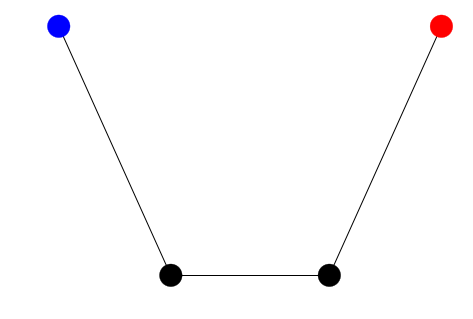

In [0]:
nx.draw(G, gpos, with_labels=False, node_size=512, node_color=node_color)

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


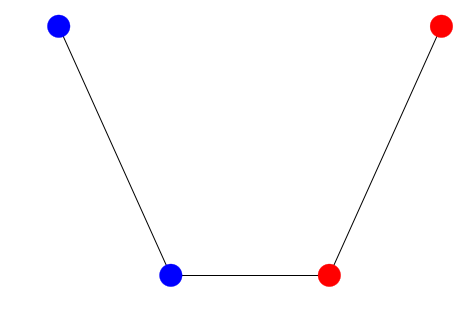

In [0]:
nx.draw(G,gpos, with_labels=False, node_size=512, node_color=node_classification.harmonic_function(G))

In [0]:
G = nx.karate_club_graph()

In [0]:
colored_clubs = ['red' if G.nodes[n]['club'] == 'Officer' else 'blue' for n in G.nodes]

In [0]:
gpos = nx.spring_layout(G, iterations=200)

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


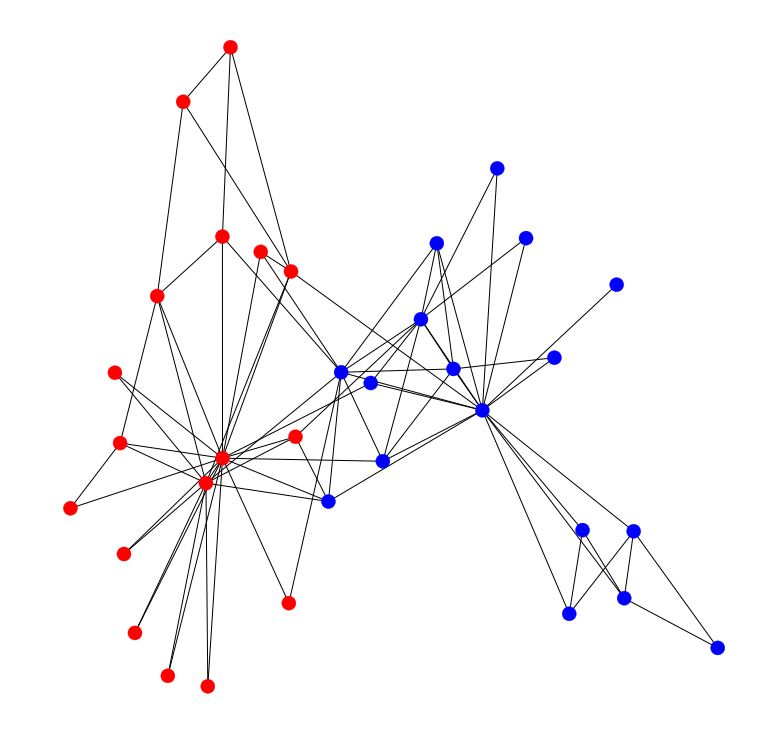

In [0]:
plt.figure(figsize=(10,10))
nx.draw(G, gpos, with_labels=False, node_size=200, node_color=colored_clubs)
plt.show()

In [0]:
label_removed = set([0, 1, 2, 3, 4, 5, 6, 7])
for i in label_removed:
    del G.node[i]['club']

In [0]:
G.node[8]['club']

'Mr. Hi'

In [0]:
colored_clubs = [
    'red' if 'club' in G.node[n] and G.node[n]['club'] == 'Officer' 
    else 'blue' if 'club' in G.node[n] and G.node[n]['club'] == 'Mr. Hi' 
    else 'gray' for n in G.nodes
]

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


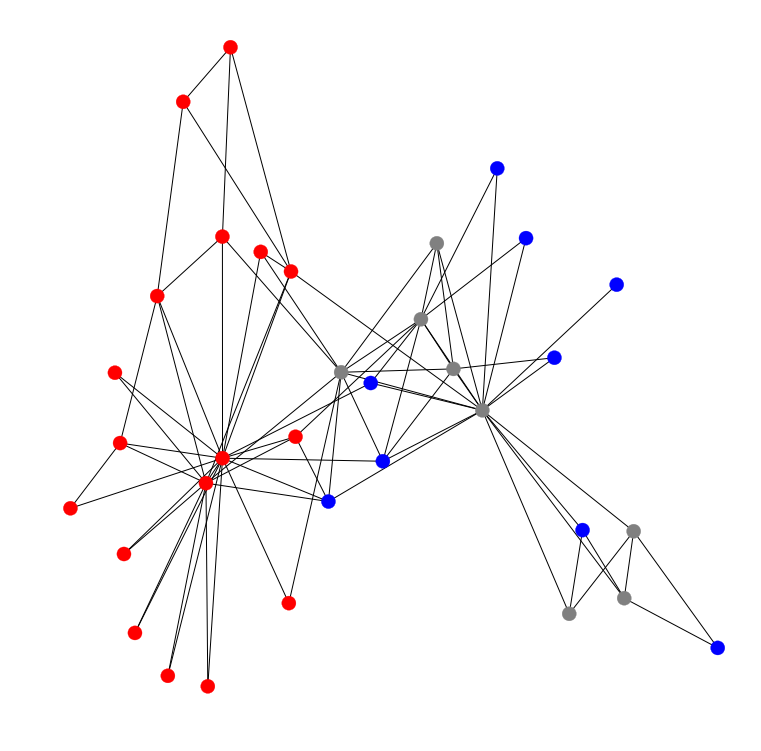

In [0]:
plt.figure(figsize=(10,10))
nx.draw(G, gpos, with_labels=False, node_size=200, node_color=colored_clubs)
plt.show()

In [0]:
from nose.tools import *

predicted = node_classification.harmonic_function(G, label_name='club')
label_not_removed = set(list(range(len(G)))) - label_removed
for i in label_not_removed:
    print(predicted[i], G.node[i]['club'])
    assert_equal(predicted[i], G.node[i]['club'])

Mr. Hi Mr. Hi
Officer Officer
Mr. Hi Mr. Hi
Mr. Hi Mr. Hi
Mr. Hi Mr. Hi
Mr. Hi Mr. Hi
Officer Officer
Officer Officer
Mr. Hi Mr. Hi
Mr. Hi Mr. Hi
Officer Officer
Mr. Hi Mr. Hi
Officer Officer
Mr. Hi Mr. Hi
Officer Officer
Officer Officer
Officer Officer
Officer Officer
Officer Officer
Officer Officer
Officer Officer
Officer Officer
Officer Officer
Officer Officer
Officer Officer
Officer Officer


# Graded Part


In [0]:
def create_toroidal(k):
    G=nx.Graph()
    count = 0
    mapping1 = {}
    mapping2 = {}
    for i in range(k):
        for j in range(k):
            mapping1[count] = (i,j)
            mapping2[(i,j)] = count
            G.add_node(count)
            count +=1
    for i in range(k):
        for j in range(k):
            if (i,j+1) in mapping2:
                G.add_edge(mapping2[(i,j)],mapping2[i,j+1])
            if (i,j-1) in mapping2:
                G.add_edge(mapping2[(i,j)],mapping2[i,j-1])
            if (i+1,j) in mapping2:
                G.add_edge(mapping2[(i,j)],mapping2[i+1,j])
            if (i-1,j) in mapping2:
                G.add_edge(mapping2[(i,j)],mapping2[i-1,j])  
    j = 0
    for i in range(k):
        G.add_edge(mapping2[(i,j)],mapping2[i,j+k-1])
    i = 0
    for j in range(k):
        G.add_edge(mapping2[(i,j)],mapping2[i+k-1,j])
    return G

In [0]:
G = create_toroidal(16)  
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [0]:
G.node[0]['label'] = 'blue'
G.node[255]['label'] = 'red'
gpos = nx.spring_layout(G, iterations=200)
node_color=['blue' if n == 0 else 'red' if n == 255 else 'gray' for n in G.nodes]

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


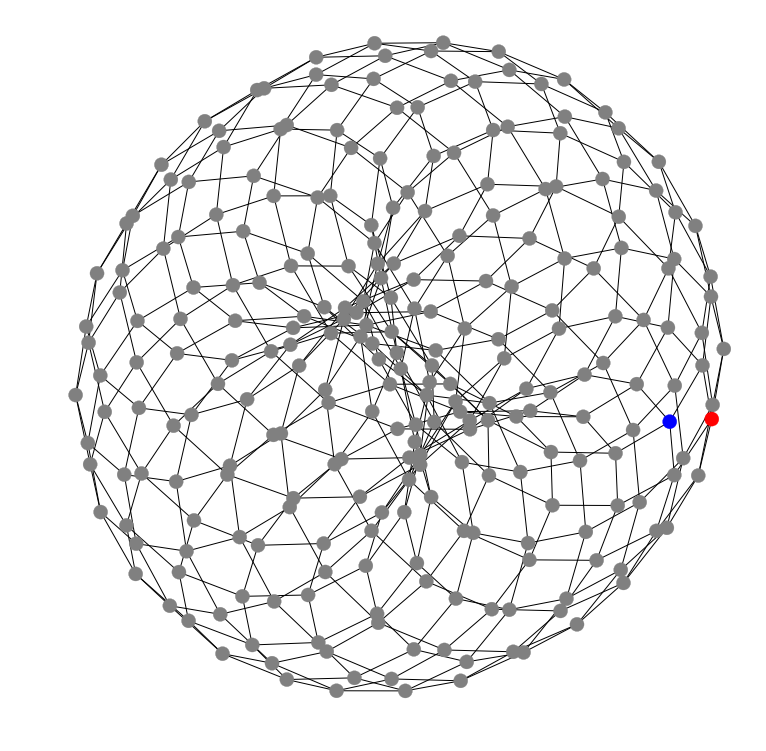

In [0]:
plt.figure(figsize=(10,10))
nx.draw(G, gpos, with_labels=False, node_size=200, node_color=node_color)
plt.show()

In [0]:
node_color=node_classification.harmonic_function(G)

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


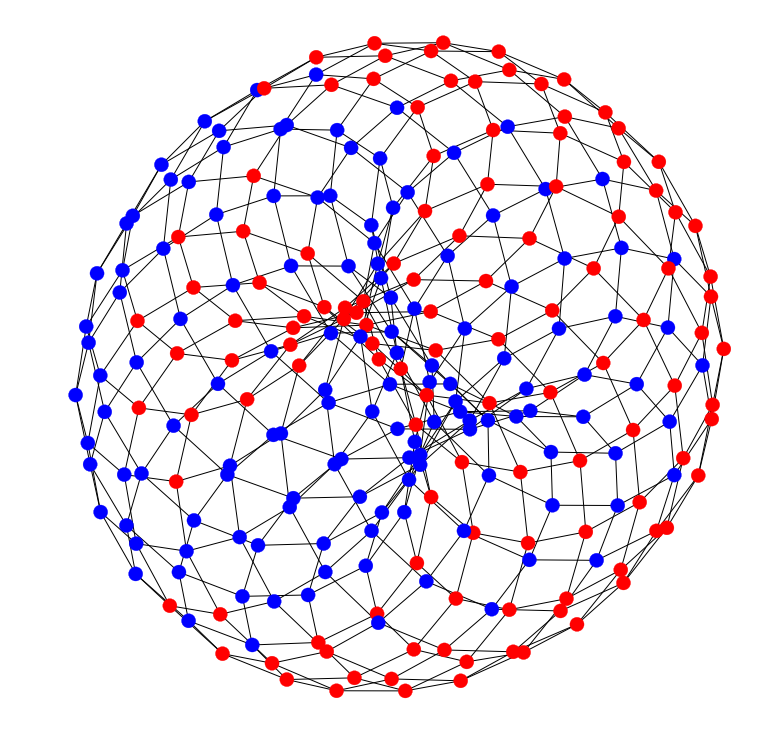

In [0]:
plt.figure(figsize=(10,10))
nx.draw(G, gpos, with_labels=False, node_size=200, node_color=node_color)
plt.show()

In [0]:
print(node_color)

['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 're

In [0]:
removed = [n for n in G.nodes if n%3 == 0 ]
for n in G.nodes:
    if n not in removed:
        G.node[n]['label'] = node_color[n]

In [0]:
print(G.node[1])
print(G.node[2])
print(G.node[3])
print(G.node[4])
print(G.node[252])
print(G.node[253])
print(G.node[254])
print(G.node[255])

{'label': 'blue'}
{'label': 'blue'}
{}
{'label': 'blue'}
{}
{'label': 'red'}
{'label': 'red'}
{'label': 'red'}


In [0]:
predicted = node_classification.harmonic_function(G, label_name='label')

In [0]:
print(predicted)

['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'r

In [0]:
for i in range(len(node_color)):
    print(predicted[i], node_color[i])
    assert_equal(predicted[i], node_color[i])

blue blue
blue blue
blue blue
blue blue
blue blue
blue blue
blue blue
blue blue
red red
red red
red red
red red
red red
red red
red red
blue blue
blue blue
blue blue
blue blue
blue blue
blue blue
blue blue
blue blue
blue blue
blue red


AssertionError: ignored

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

In [0]:
confusion_matrix(node_color, predicted)

array([[136,   0],
       [  2, 118]])

In [0]:
precision_recall_fscore_support(node_color, predicted)

(array([0.98550725, 1.        ]),
 array([1.        , 0.98333333]),
 array([0.99270073, 0.99159664]),
 array([136, 120]))

# Harmonic function implementation

In [0]:
def your_harmonic_function(Graph, label_name):
  
    labeled_nodes = []
    for node in Graph.nodes:
        if label_name in Graph.nodes[node]:
            labeled_nodes.append(node)

    sorting = {}
    n = len(Graph.nodes)
    i = 0
    j = n-1
    for node in Graph.nodes:
        if label_name in Graph.nodes[node]:
            sorting[node] = i
            i += 1
        else:
            sorting[node] = j
            j -= 1

    remapped_graph = nx.relabel_nodes(Graph, sorting)
    nodes = remapped_graph.nodes
    edges = remapped_graph.edges
    adjacency_matrix = np.zeros([n, n])
    d_m = np.zeros([n, n])
    lab_cnt = len(labeled_nodes)

    for edge in edges:
      
        fr = edge[0]
        to = edge[1]

        adjacency_matrix[fr, to] = 1
        adjacency_matrix[to, fr] = 1

        d_m[fr, fr] += 1
        d_m[to, to] += 1

    W_ul = [[adjacency_matrix[i, j] for i in range(lab_cnt)] for j in range(lab_cnt, n)]
    W_uu = [[adjacency_matrix[i, j] for i in range(lab_cnt, n)] for j in range(lab_cnt, n)]
    D_uu = [[d_m[i, j] for i in range(lab_cnt, n)] for j in range(lab_cnt, n)]

    float_label = []
    for node in nodes:
        if label_name in nodes[node]:
            if nodes[node][label_name] == 'blue':
                float_label.append(1)
            else:
                float_label.append(0)

    labeled_list = np.linalg.inv(np.subtract(D_uu, W_uu))
    labeled_list = np.dot(labeled_list,W_ul)
    labeled_list = np.dot(labeled_list,float_label)

    for node in nodes:
        if node >= lab_cnt:
            if labeled_list[node - lab_cnt] >= 0.5:
                nodes[node][label_name] = 'blue'
            else:
                nodes[node][label_name] = 'red'

    inverted_map = {v: k for k, v in sorting.items()}
    restored_graph = nx.relabel_nodes(remapped_graph, inverted_map)

    labeled_list = ['' for x in range(n)]

    for node in restored_graph.nodes:
        labeled_list[node] = restored_graph.nodes[node][label_name]

    return labeled_list


/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


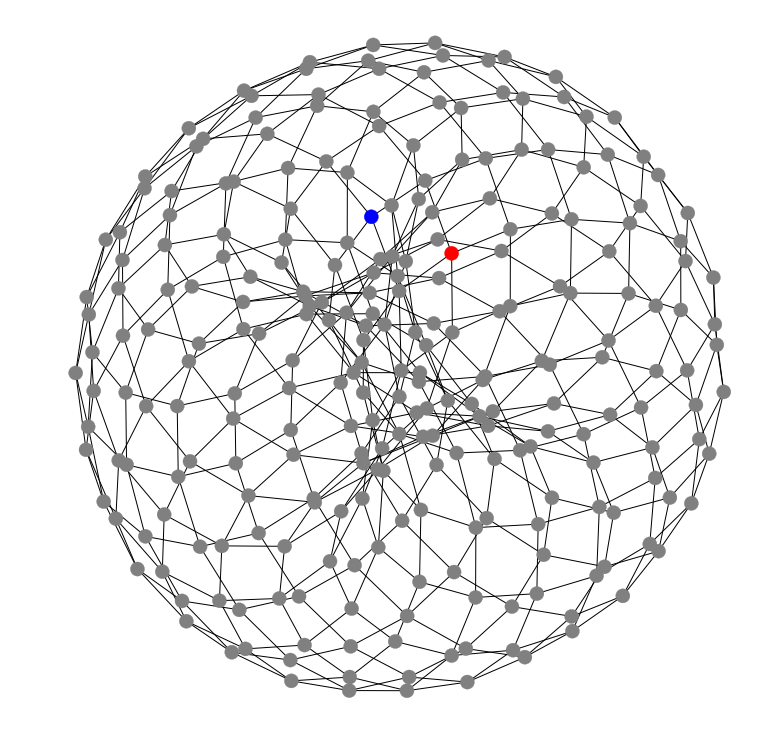

In [48]:
G = create_toroidal(16)  
G.node[0]['label'] = 'blue'
G.node[255]['label'] = 'red'
gpos = nx.spring_layout(G, iterations=200)
node_color=['blue' if n == 0 else 'red' if n == 255 else 'gray' for n in G.nodes]
plt.figure(figsize=(10,10))
nx.draw(G, gpos, with_labels=False, node_size=200, node_color=node_color)
plt.show()

In [49]:
node_color=node_classification.harmonic_function(G)
removed = [n for n in G.nodes if n%3 == 0 ]
for n in G.nodes:
    if n not in removed:
        G.node[n]['label'] = node_color[n]
predicted = your_harmonic_function(G, label_name='label')

confusion_matrix(node_color, predicted)
precision_recall_fscore_support(node_color, predicted)

(array([0.98550725, 1.        ]),
 array([1.        , 0.98333333]),
 array([0.99270073, 0.99159664]),
 array([136, 120]))